## Advanced Data Distribution Analysis with Outlier Scoring and Visualization Using IQR

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### 1. Function Input: A vector of numerical values loaded from Data1.txt.

In [229]:
data = np.loadtxt(r"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 1/Data-1.txt")

### 2. Function

In [230]:
def fundist(vector):
    #Basic Statistical Measures
    B_mean = np.mean(vector)
    B_median = np.median(vector)
    B_STD = np.std(vector)
    B_var = np.var(vector)
    
    #Quartile Values and IQR
        # Calculate indices for Q1 and Q3
    vector = np.sort(vector)
    v_length = len(vector)
    Q1_index = (v_length + 1) * 0.25 - 1   # add one aligns with percentile logic , subtract 1 as Python’s 0-based indexing
    Q3_index = (v_length + 1) * 0.75 - 1   # add one aligns with percentile logic , subtract 1 as Python’s 0-based indexing
    
        # Quartile Values and IQR
    Q1 = vector[int(Q1_index)] if Q1_index.is_integer() else (vector[int(Q1_index)] + vector[int(Q1_index) + 1]) / 2
    Q2 = np.median(vector)
    Q3 = vector[int(Q3_index)] if Q3_index.is_integer() else (vector[int(Q3_index)] + vector[int(Q3_index) + 1]) / 2
    IQR = Q3 - Q1
    
        # Thresholds for outliers
    O_lower_threshold = Q1 - 1.5 * IQR
    O_upper_threshold = Q3 + 1.5 * IQR
    E_lower_threshold = Q1 - 3 * IQR
    E_upper_threshold = Q3 + 3 * IQR
    
        # Identify Outliers and Extreme Outliers
    Outliers = list(vector[(vector < O_lower_threshold) | (vector > O_upper_threshold)])
    Extreme_Outliers = list(vector[(vector < E_lower_threshold) | (vector > E_upper_threshold)])
    
        # Outlier Scoring
    Outliers_dct ={}
    for i in vector:
        if i < O_lower_threshold:
            Outliers_dct[i] = (Q1 - i) / IQR
        elif i > O_upper_threshold:
            Outliers_dct[i] = (i - Q3) / IQR
        
        # Outliers Classification
    Outlier_classes = {}
    for key,value in Outliers_dct.items():
        if 1.5 <= value < 3:
            Outlier_classes[key] = "Moderate"
        elif 3 <= value < 5:
            Outlier_classes[key] = "High"
        elif value > 5:
            Outlier_classes[key] = "Extreme"

        # Exclude Outliers
    
    M_exclude_list = [k for k, v in Outlier_classes.items() if v == "Moderate"]
    H_exclude_list = [k for k, v in Outlier_classes.items() if v == "High"]
    E_exclude_list = [k for k, v in Outlier_classes.items() if v == "Extreme"]
    
        # Compute Revised Statistics for each case
        
    M_rvd = vector[~np.isin(vector, M_exclude_list)]
    H_rvd = vector[~np.isin(vector, H_exclude_list)]
    E_rvd = vector[~np.isin(vector, E_exclude_list)]
    m_mean,m_median,m_std = np.mean(M_rvd), np.median(M_rvd),np.std(M_rvd) # analysis after moderate outlier removal   
    h_mean, h_median, h_std = np.mean(H_rvd), np.median(H_rvd), np.std(H_rvd) # analysis after high outlier removal
    e_mean , e_median, e_std= np.mean(E_rvd), np.median(E_rvd), np.std(E_rvd) # analysis after extreme outlier removal
    
    return {
        "Basic Stats": {"Mean": B_mean, "Median": B_median, "STD": B_STD, "Variance": B_var},
        "Outliers": Outliers,
        "Extreme_Outliers": Extreme_Outliers,
        "Outlier_Classes": Outlier_classes,
        "Data_WZT_Moderate": M_rvd, 
        "Data_WZT_High": H_rvd, 
        "Data_WZT_Extreme": E_rvd, 
        "Revised Stats": {
            "Removed Moderate Outliers": {"Mean": m_mean, "Median": m_median, "STD": m_std},
            "Removed High Outliers": {"Mean": h_mean, "Median": h_median, "STD": h_std},
            "Removed Extreme Outliers": {"Mean": e_mean, "Median": e_median, "STD": e_std},
        }
    }

### 3.Output

In [231]:
result = fundist(data)

### 4.	Visualization

#### a. Histogram and Box Plot for original data

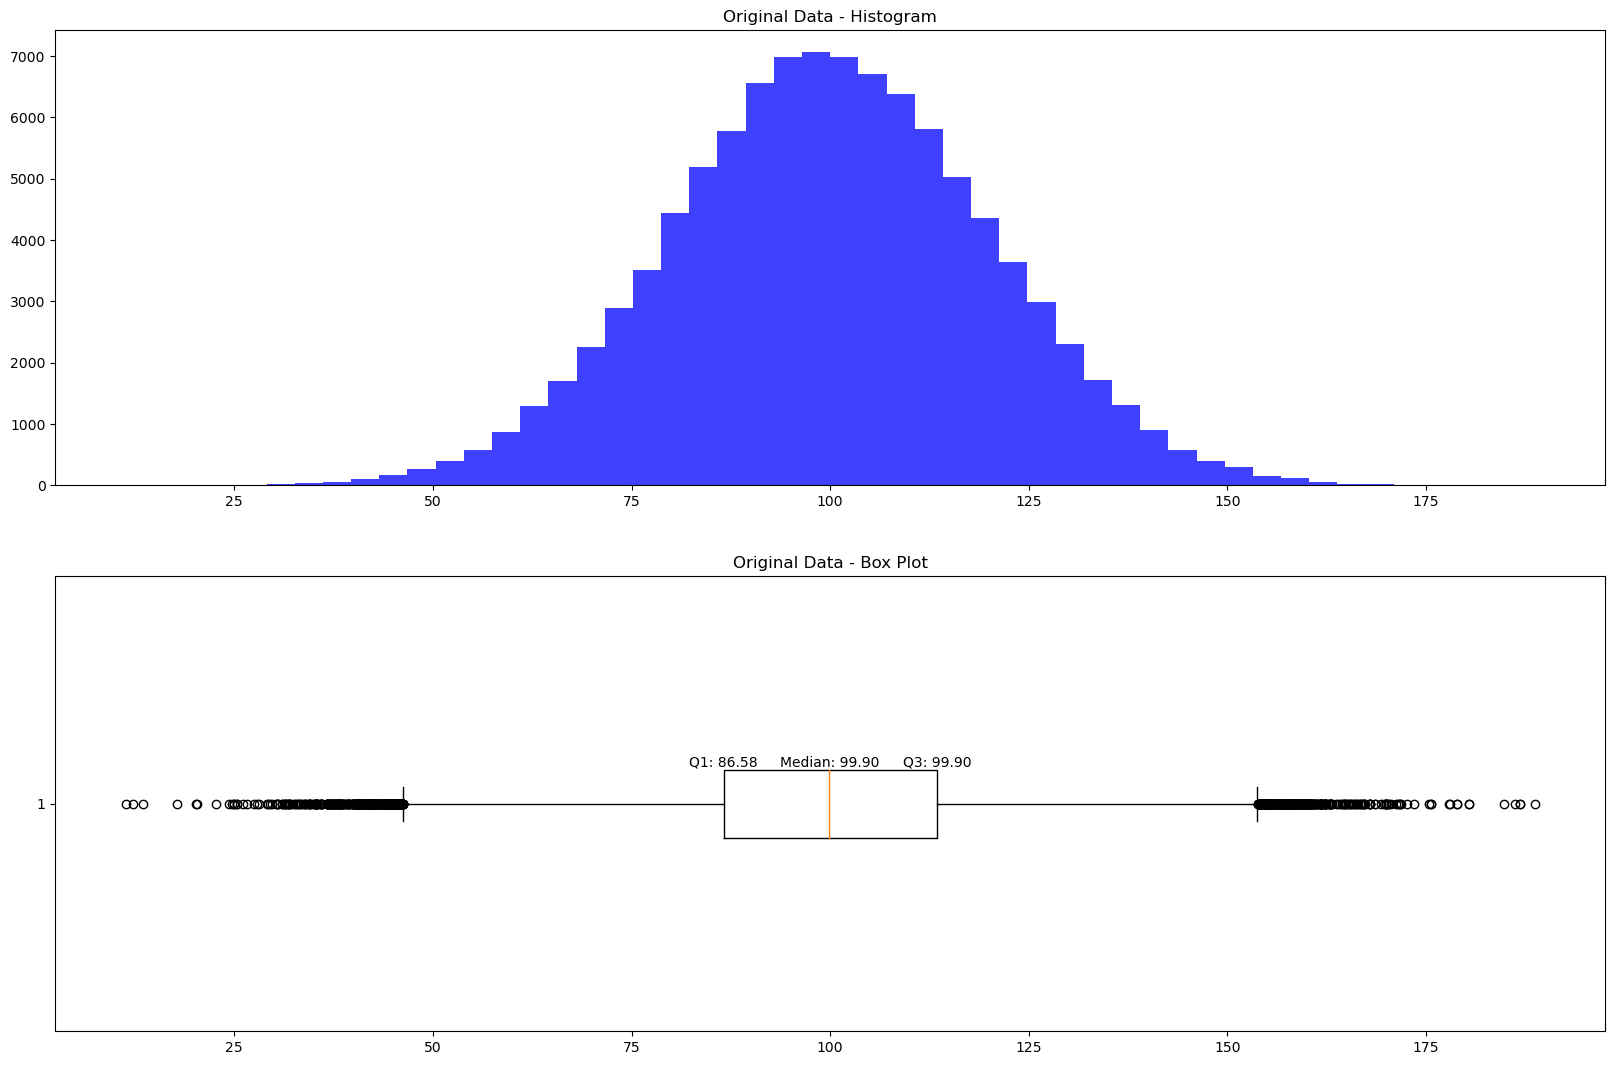

In [232]:
fig, ax = plt.subplots(2,1,figsize=(20, 13))
ax[0].set_title("Original Data - Histogram")
ax[0].hist(data, bins=50, alpha=0.75, color='b') # histogram
ax[1].set_title("Original Data - Box Plot")
ax[1].boxplot(data,vert=False) # boxplot

ax[1].text(np.median(data), 1.09, f'Median: {np.median(data):.2f}', horizontalalignment='center', verticalalignment='center')
ax[1].text(np.quantile(data,0.25), 1.09, f'Q1: {np.quantile(data,0.25):.2f}', horizontalalignment='center', verticalalignment='center')
ax[1].text(np.quantile(data,0.75), 1.09, f'Q3: {np.median(data):.2f}', horizontalalignment='center', verticalalignment='center')

plt.show()

#### b. Outlier Removal Impact

In [233]:
def funcdrawer(data):
    fig, ax = plt.subplots(2,1,figsize=(20, 13))
    ax[0].set_title("Original Data - Histogram")
    ax[0].hist(data, bins=50, alpha=0.75, color='b') # histogram
    ax[1].set_title("Original Data - Box Plot")
    ax[1].boxplot(data,vert=False) # boxplot
    ax[1].text(np.median(data), 1.09, f'Median: {np.median(data):.2f}', horizontalalignment='center', verticalalignment='center')
    ax[1].text(np.quantile(data,0.25), 1.09, f'Q1: {np.quantile(data,0.25):.2f}', horizontalalignment='center', verticalalignment='center')
    ax[1].text(np.quantile(data,0.75), 1.09, f'Q3: {np.median(data):.2f}', horizontalalignment='center', verticalalignment='center')
    plt.tight_layout()
    plt.savefig(r"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 1/Hist_Box.png")
    plt.show()

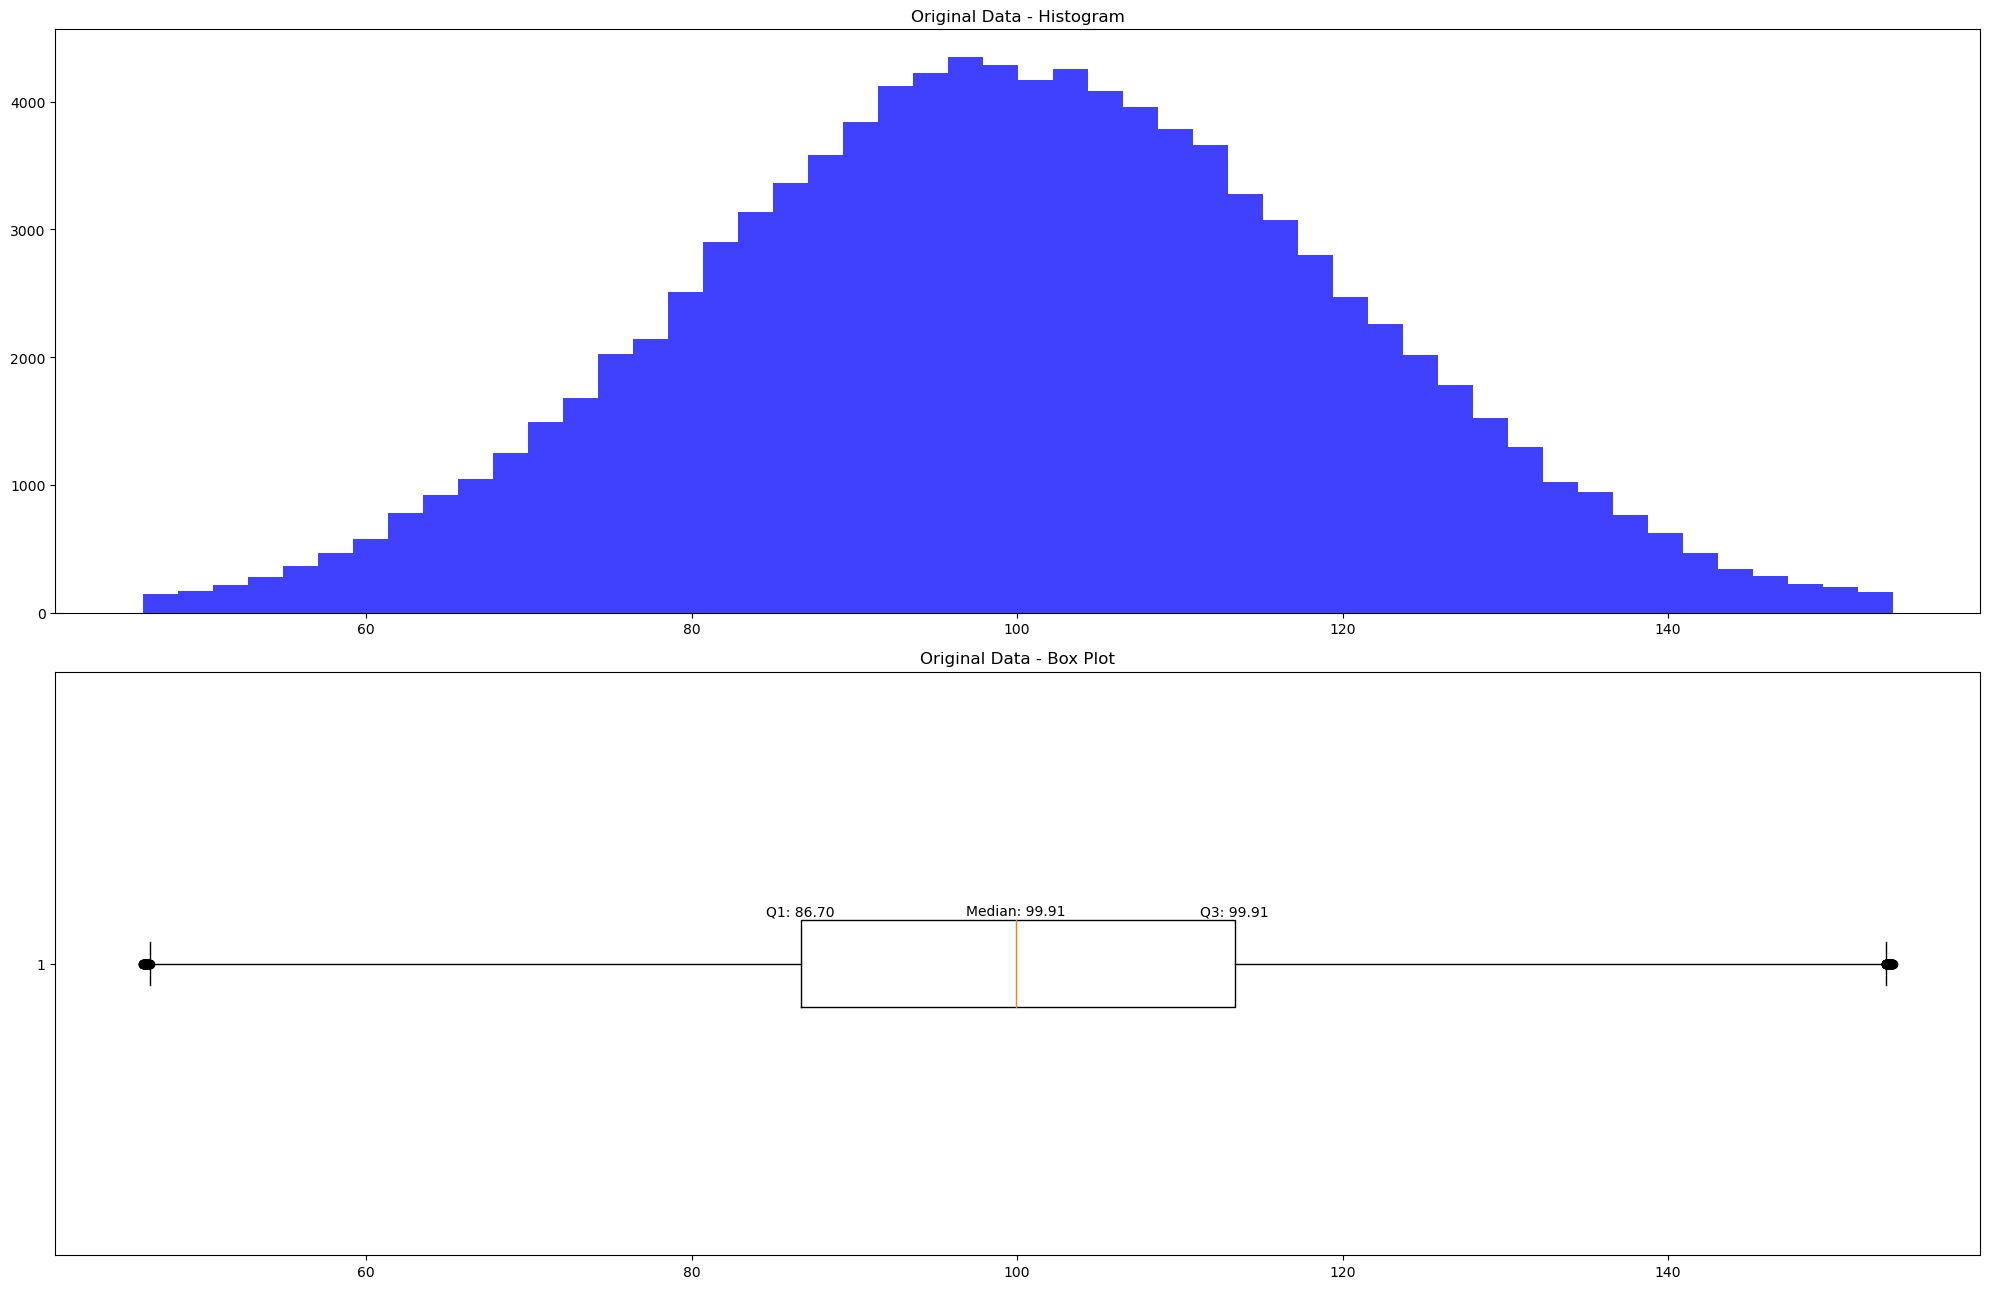

In [234]:
# Moderate Removal
funcdrawer(result["Data_WZT_Moderate"])

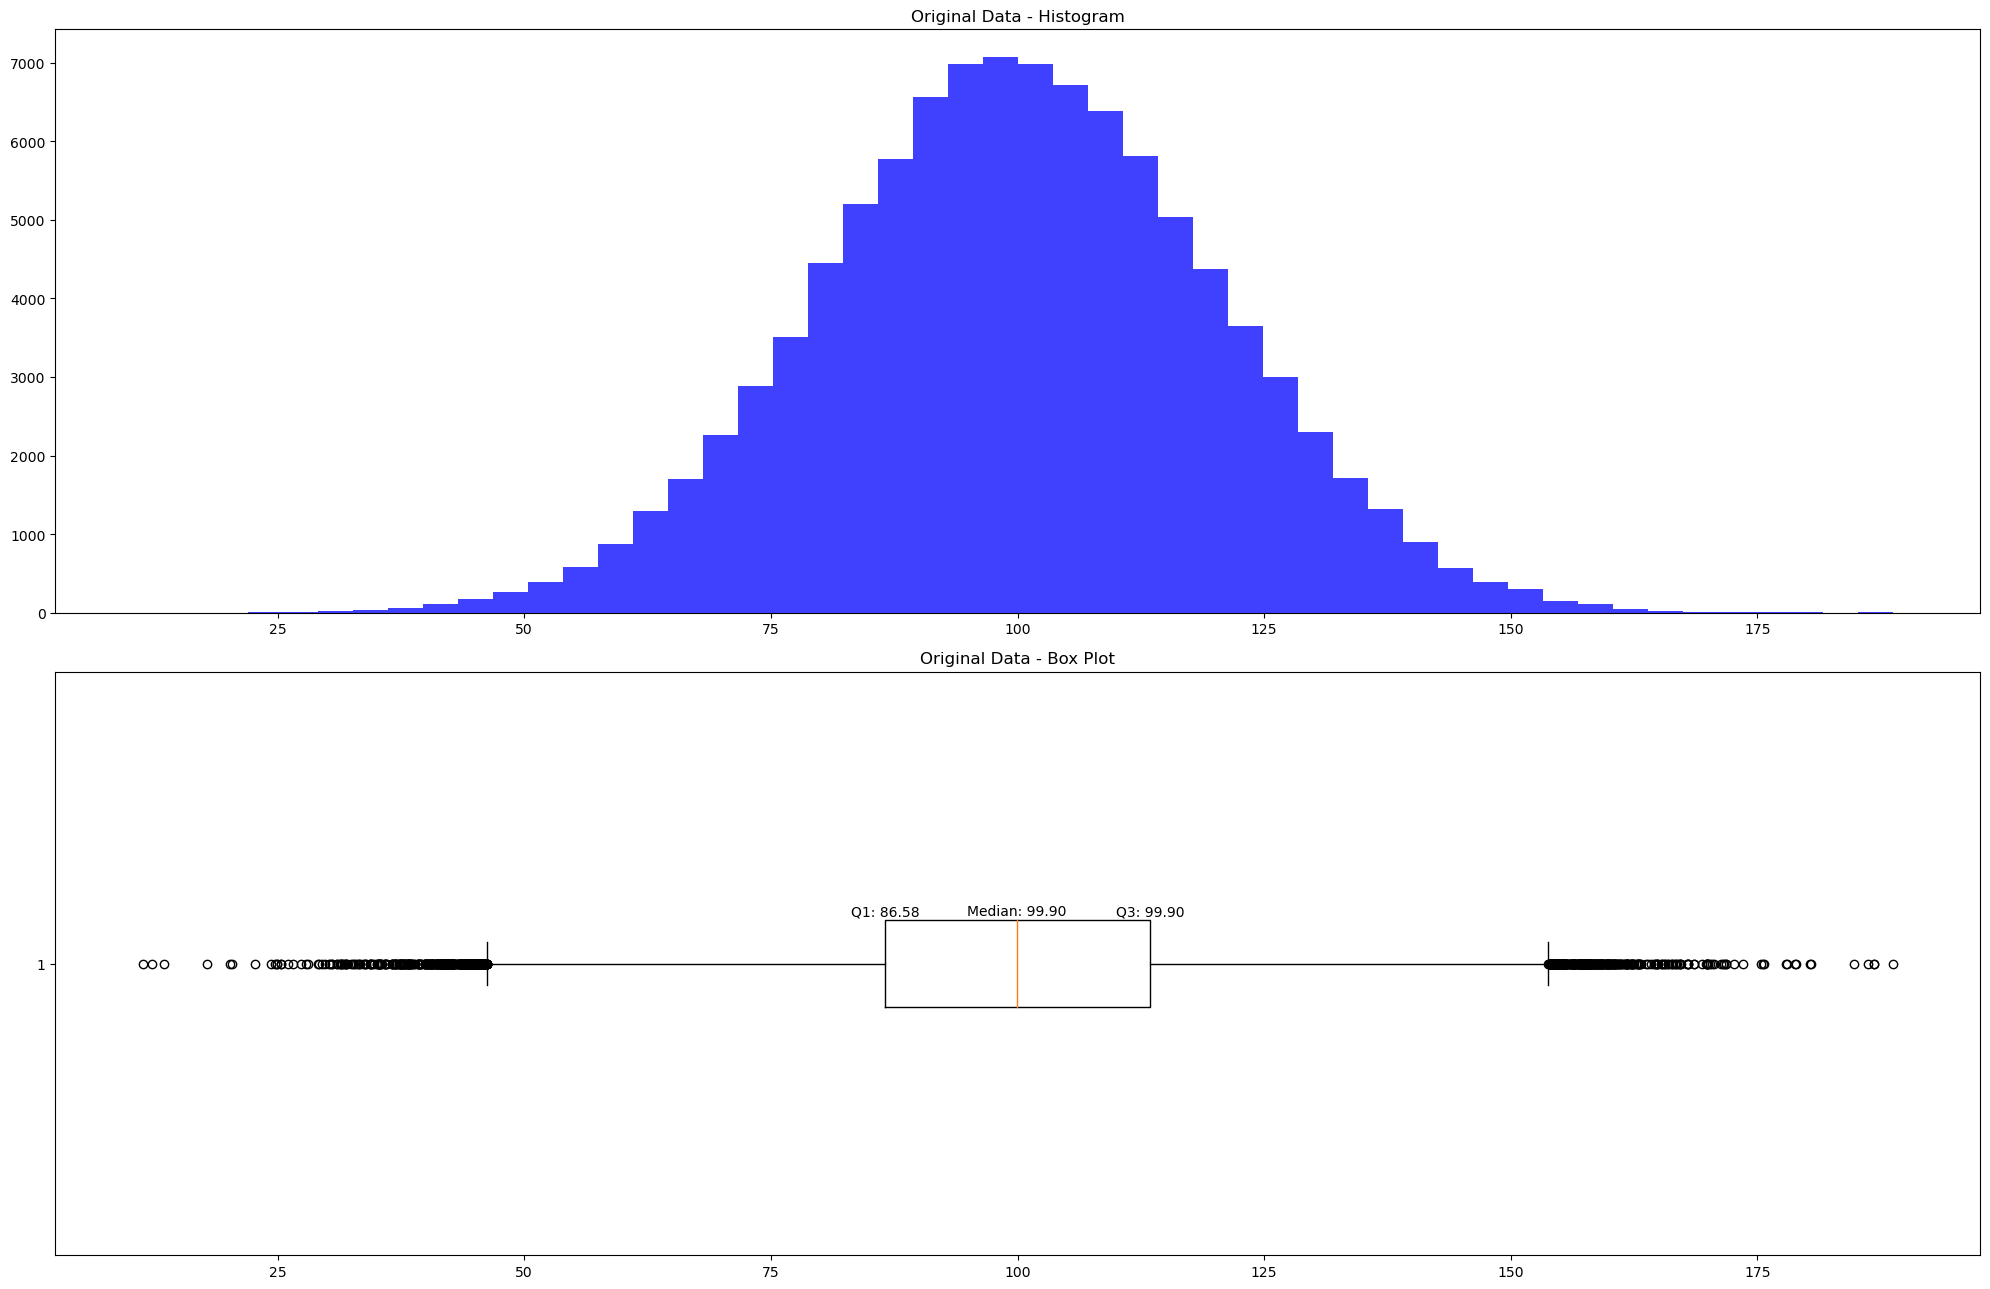

In [235]:
# High Removal
funcdrawer(result["Data_WZT_High"])

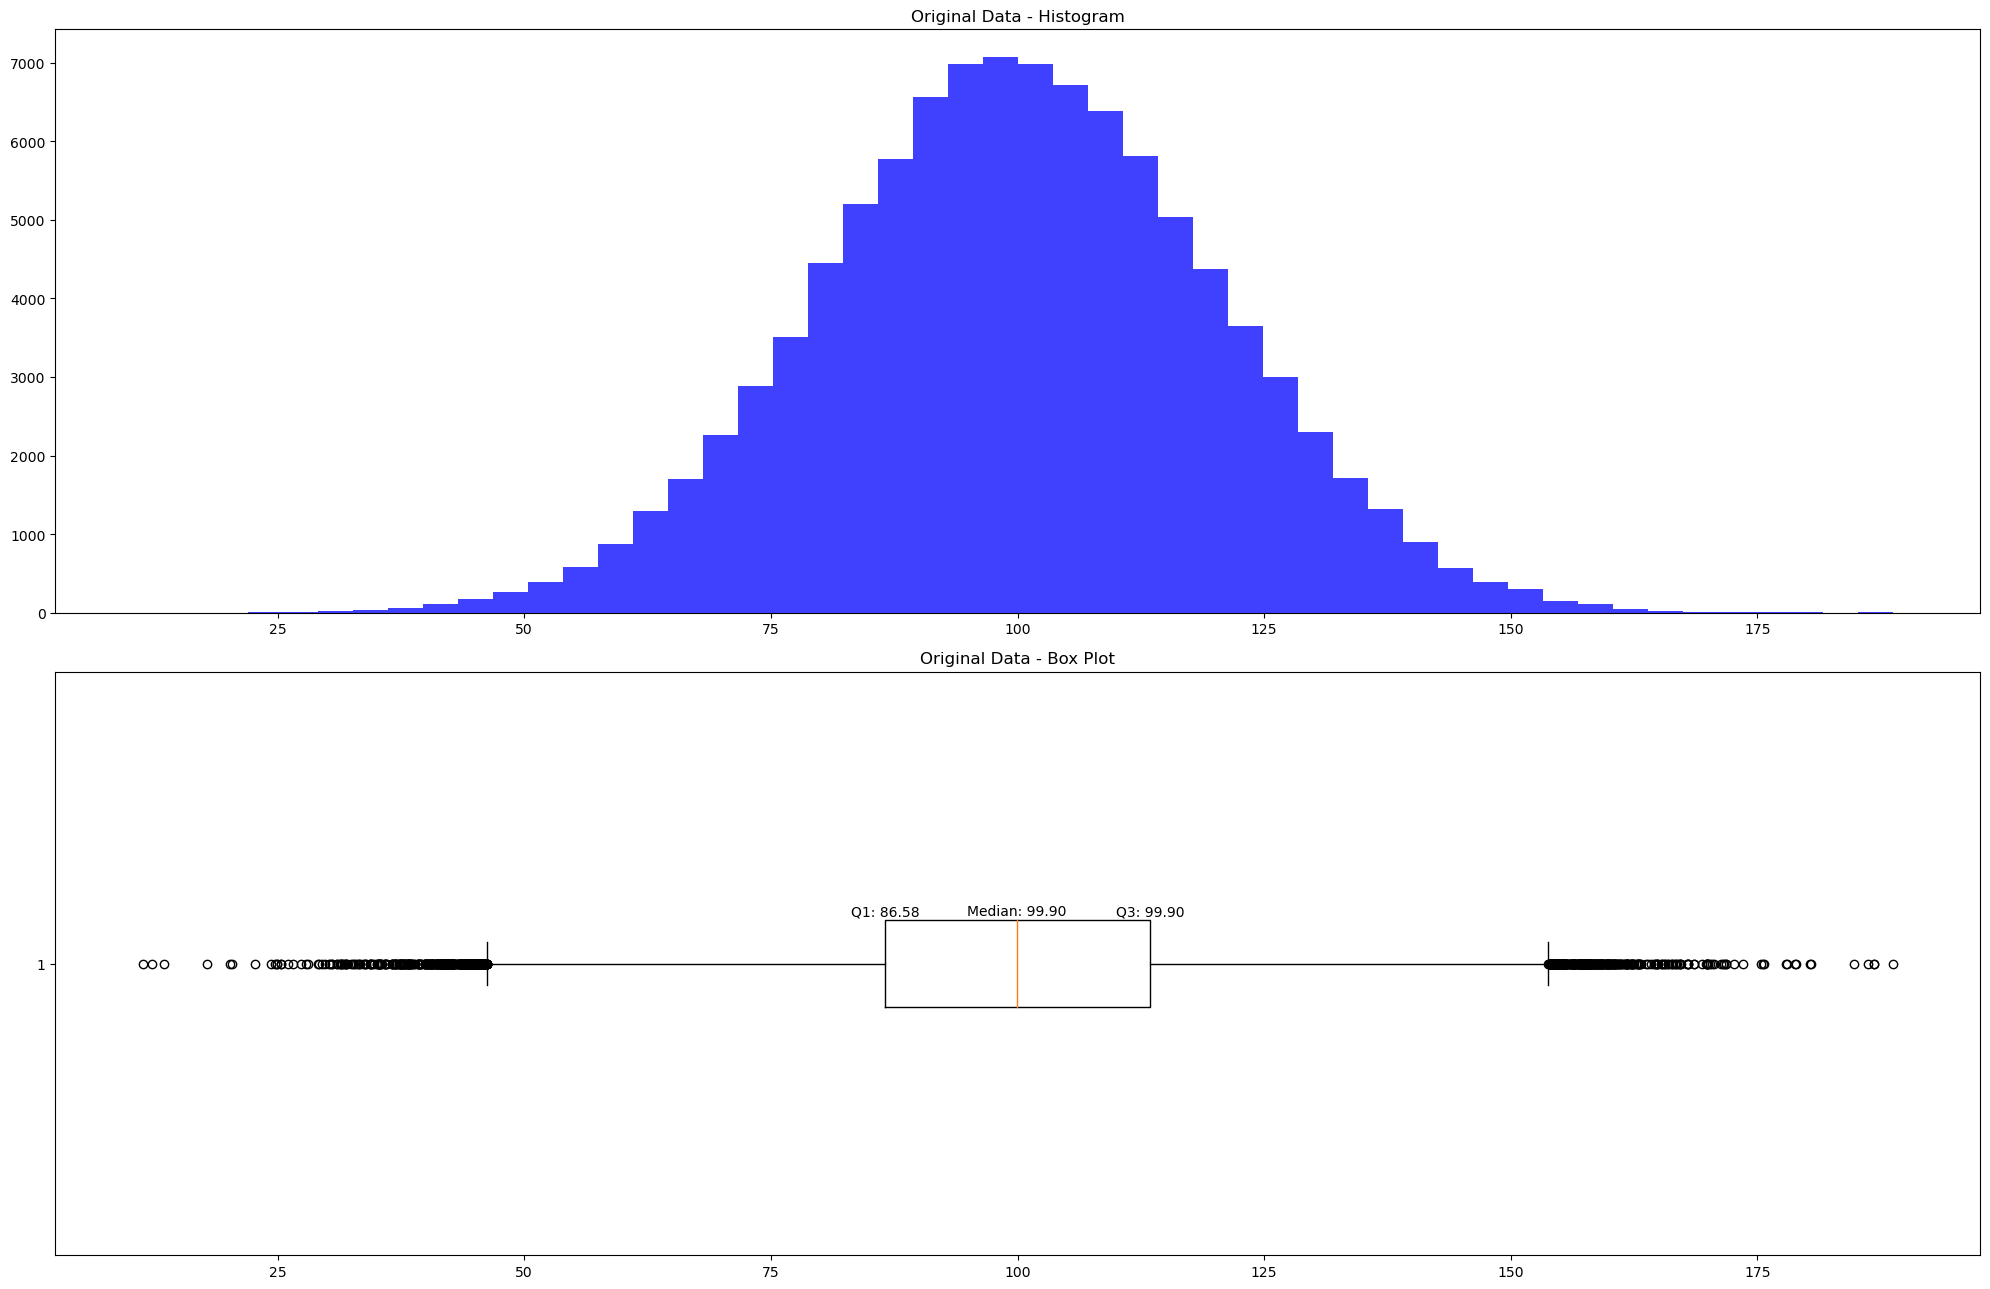

In [236]:
# High Extreme
funcdrawer(result["Data_WZT_Extreme"])

#### c. Line Plot for Statistics

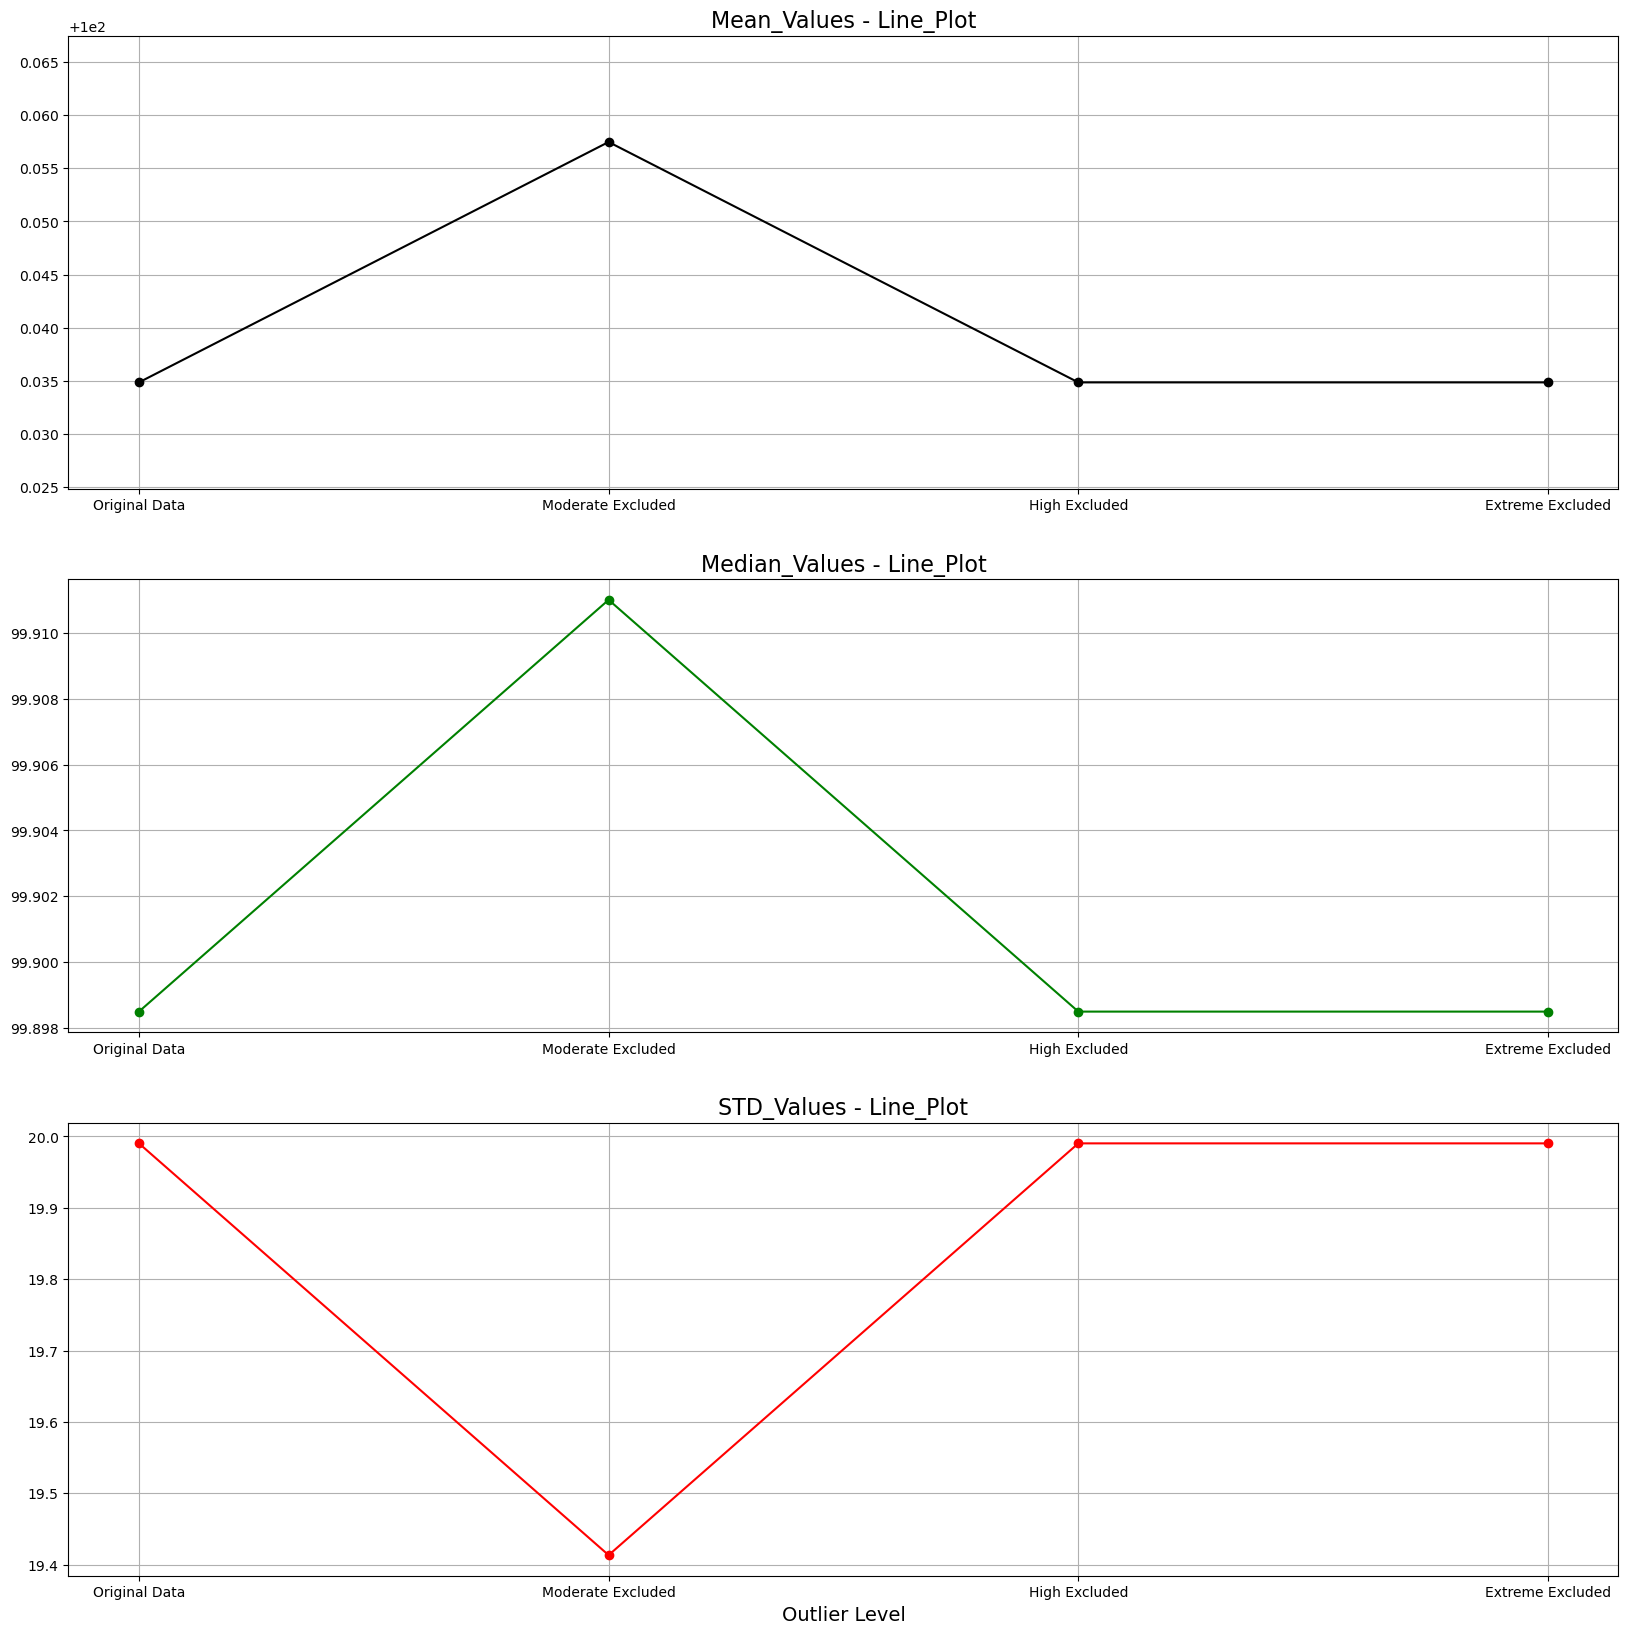

In [237]:
stats = result["Revised Stats"]

# Prepare the data for plotting
outlier_levels = ["Original Data", "Moderate Excluded", "High Excluded", "Extreme Excluded"]
mean_values = [result["Basic Stats"]["Mean"], stats["Removed Moderate Outliers"]["Mean"], stats["Removed High Outliers"]["Mean"], stats["Removed Extreme Outliers"]["Mean"]]
median_values = [result["Basic Stats"]["Median"], stats["Removed Moderate Outliers"]["Median"], stats["Removed High Outliers"]["Median"], stats["Removed Extreme Outliers"]["Median"]]
std_values = [result["Basic Stats"]["STD"], stats["Removed Moderate Outliers"]["STD"], stats["Removed High Outliers"]["STD"], stats["Removed Extreme Outliers"]["STD"]]

# Plotting
fig, ax = plt.subplots(3,1,figsize=(20, 20))
# mean
ax[0].set_title("Mean_Values - Line_Plot", fontsize=16)
ax[0].plot(outlier_levels, mean_values, marker='o', color='black')
ax[0].set_ylim(min(mean_values) - 0.01, max(mean_values) + 0.01)
ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].grid(True)
# Median
ax[1].set_title("Median_Values - Line_Plot", fontsize=16)
ax[1].plot(outlier_levels, median_values, marker='o', color='green')
ax[1].grid(True) 
# STD
ax[2].set_title("STD_Values - Line_Plot", fontsize=16)
ax[2].plot(outlier_levels, std_values,marker='o', color='red')
ax[2].grid(True)  # Enable grid for std plot

# Set x-axis label
plt.xlabel("Outlier Level", fontsize=14)

# Save the figure to an image file (e.g., PNG)
output_image_path = r"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 1/Line_Plots.png"
plt.savefig(output_image_path)

# Show the plot
plt.grid(True)  
plt.show()